# Homework 1 Problem 2.2
We import sympy and pyplot. For this problem we will also need $|x|$, so we need to get the complex number absolute value. Looking up in the sympy documentation, this is in sympy.functions.Abs(), so we need to import that, or else type functions.Abs() each time. We do the same for the complex conjugate, which is just conjugate().
We also want to look up what the complex number $i$ is for sympy, but that is simply I.

In [1]:
from sympy import *
from sympy.functions import Abs, conjugate
import matplotlib.pyplot as plt

We want to define $\Psi$ as a function so we can use it in multiple parts of the problem. As usual, we also define variables we need.

In [2]:
A, lam, x, om, t = symbols("A lam x om t",real=True)
assumptions.assume.global_assumptions.add(Q.positive(lam))
psi = Function('psi')(x)
psi = A*exp(-lam*Abs(x) - I*om*t)
simplify(conjugate(psi)*psi)

A**2*exp(-2*lam*Abs(x))

We can now get the normalization factor:

In [3]:
integrate(conjugate(psi)*psi,(x,-oo,oo))

Piecewise((A**2/lam, Abs(periodic_argument(lam, oo)) < pi/2), (Integral(A**2*exp(-lam*Abs(x) - I*om*t)*exp(-lam*Abs(x) + I*om*t), (x, -oo, oo)), True))

So the equation to normalize the wave function is:
$$ \frac{A^2}{\lambda}=1 \Rightarrow A = \sqrt{\lambda}$$, since we can freely choose the positive root. Note that it does not make a difference if you choose any other root, including complex ones. Since you always end up squaring the wave function, any complex phase will drop out.

In [4]:
psi = sqrt(lam)*exp(-lam*Abs(x) - I*om*t)

We can now do the rest of the homework. 
$$\left< x \right> = \int_{-\infty}^\infty \Psi^* x \Psi dx$$
$$\left< x^2 \right> = \int_{-\infty}^\infty \Psi^* x^2 \Psi dx$$


In [5]:
print integrate(conjugate(psi)*x*psi,(x,-oo,oo))
print integrate(conjugate(psi)*x*x*psi,(x,-oo,oo))

Piecewise((0, Abs(periodic_argument(lam, oo)) < pi/2), (Integral(sqrt(lam)*x*exp(-lam*Abs(x) - I*om*t)*exp(-lam*Abs(x) + I*om*t)*conjugate(sqrt(lam)), (x, -oo, oo)), True))
Piecewise((conjugate(sqrt(lam))/(2*lam**(5/2)), Abs(periodic_argument(lam, oo)) < pi/2), (Integral(sqrt(lam)*x**2*exp(-lam*Abs(x) - I*om*t)*exp(-lam*Abs(x) + I*om*t)*conjugate(sqrt(lam)), (x, -oo, oo)), True))


So the first integral is zero, which was to be expected for an odd function integrated over even bounds. The second integral gives a more simplified answer if we first compute $\Psi^* \Psi$, and then integrate, though you can easily simplify the expression found above.

In [6]:
integrate(x*x*lam*exp(-2*lam*Abs(x)),(x,-oo,oo))

Piecewise((1/(2*lam**2), Abs(periodic_argument(lam, oo)) < pi/2), (Integral(lam*x**2*exp(-2*lam*Abs(x)), (x, -oo, oo)), True))

The results are $\left< x \right> = 0$ and $\left< x^2 \right> = \frac{1}{2\lambda^2}$, and so $\sigma^2 =  \frac{1}{2\lambda^2} - 0 \Rightarrow \sigma = \frac{1}{\sqrt{2}\lambda}$

Now sketch the function. Choose $t=0$, invert our previous answer to get $\lambda = \frac{1}{\sqrt{2}\sigma}$

In [7]:
import numpy as np
def psi_f(x,sig):
    return(  np.sqrt(1/(np.sqrt(2)*sig))*np.exp(-np.abs(x)/(np.sqrt(2)*sig)))

We can now evaluate the function and make our plot. We can plot a number of different sigmas on the same graph so you get a sense of how changing sigma changes the curve.

In [8]:
x_r = np.arange(-5,5,0.01)  # Set the range in x, with a small step size.

In [9]:
plt.figure(figsize=(10,5))
x_ave=0
for s in [0.5,1,2]:
    p=plt.plot(x_r,psi_f(x_r,s),label="sigma={}".format(s))
    x1 = x_ave-s # Draw lines
    x2 = x_ave-s
    plt.plot([x1, x2], [-0.05, 0.1],color=p[0].get_color(), linestyle='-', linewidth=3)
    x1 = x_ave+s
    x2 = x_ave+s
    plt.plot([x1, x2], [-0.05, 0.1],color=p[0].get_color(), linestyle='-', linewidth=3)
    plt.legend() 
    plt.title("Graph of the wavefunction for t=0")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True,which='both')

In [10]:
plt.savefig('Homework_1p2_2.pdf',format='pdf')  # Save the figure to a file, so you can print it separately.

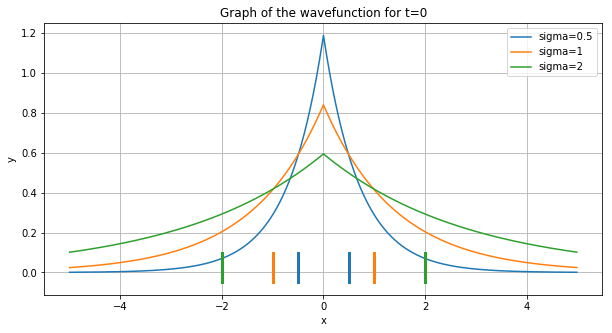

In [11]:
plt.show()